In [4]:
%matplotlib inline

KeyboardInterrupt: 

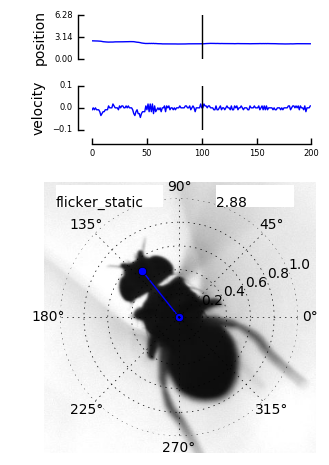

In [116]:
from matplotlib import animation
import numpy as np
from matplotlib import pyplot as plt
from thllib import flylib as flb
import figurefirst as fifi
import sys

reload(fifi)
flynum = 1344
fly = flb.NetFly(flynum)
fly.open_signals(['hdf5','txt'])
position = fly.position
velocity = fly.velocity

### make the condition blocks
blocks = fly.order
block_times = list()
t = 0
for b in blocks:
    block_times.append(t)
    if b == 'flicker_static\n':
        t+=10
    else:
        t+=30

### function to return the correct condition for a given time
def get_cond(t,blocks,block_times):
    return np.array(blocks)[np.argwhere(t >= np.array(block_times))[-1]][0].strip()

layout = fifi.FigureLayout('movie_layout.svg')
layout.make_mplfigures()

idx = 5000
window = 100

#positions = angles[np.argmax(filt_cor,axis=1)]
first_frame = np.squeeze(np.argwhere(np.array(fly.avepxl)>10)[0]) + 1

fig = plt.gcf()

img = layout.axes['image'].imshow(fly.images[idx+first_frame],cmap = plt.cm.gray,vmin = 0,vmax = 255)
ln = layout.axes['polar'].plot([position[idx],position[idx]],[0,0.5],'-o')
layout.axes['polar'].patch.set_alpha(0.0)
layout.axes['polar'].set_ybound(0,1)
fn = layout.axes['framenum'].text(0,0,str(0),fontsize = 10)
cond = layout.axes['condition'].text(0,0,get_cond(0,blocks,block_times),fontsize = 10)

ptrace = layout.axes['position'].plot(position[idx-window:idx+window])
vtrace = layout.axes['velocity'].plot(velocity[idx-window:idx+window])
layout.axes['position'].axvline(window,color = 'k')
layout.axes['velocity'].axvline(window,color = 'k')
layout.axes['position'].set_ylabel('position')
layout.axes['velocity'].set_ylabel('velocity')
layout.apply_mpl_methods()

layout.axes['position'].tick_params(axis='both', which='major', labelsize=6)
layout.axes['velocity'].tick_params(axis='both', which='major', labelsize=6)
layout.axes['velocity'].ticklabel_format()

fifi.mpl_functions.set_spines(layout)

mpath = fly.flypath + '/' + 'tracking_test.mp4'
def animate(idx):
    l = np.maximum(idx-window,0)
    r = np.minimum(idx+window,len(position))
    img.set_data(fly.images[idx+first_frame-1])
    ln[0].set_data([position[idx],position[idx]],[0,0.5])
    ptrace[0].set_data(np.arange(0,r-l),position[l:r])
    vtrace[0].set_data(np.arange(0,r-l),velocity[l:r])
    t = float(times[idx])
    fn.set_text(str(t))
    cond.set_text(get_cond(t,blocks,block_times))
    return img,ln[0],
    if not((idx%200)>0):
            print idx
#animate(804)   
#anim = animation.FuncAnimation(fig, animate,frames=np.arange(100,len(times)-1000), interval=20,blit = True)
anim = animation.FuncAnimation(fig, animate,frames=np.arange(100,20000), interval=20,blit = True)
anim.save(mpath, fps=30, extra_args=['-vcodec', 'h264', '-pix_fmt','yuv420p'])

In [118]:
np.arange(0,len(fly.images))*1/50.0

array([  0.00000000e+00,   2.00000000e-02,   4.00000000e-02, ...,
         1.21688000e+03,   1.21690000e+03,   1.21692000e+03])